In [2]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbn

In [3]:
df=pd.read_csv("Heart.csv")

In [4]:
df


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [5]:
print("Shape of the dataset: ", df.shape)

Shape of the dataset:  (303, 15)


In [6]:
print("Data types of the fields in this dataset: ", df.dtypes)

Data types of the fields in this dataset:  Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object


In [7]:
print("Missing values/Nans in the following dataset can be shown as follows: ", df.isnull())

Missing values/Nans in the following dataset can be shown as follows:       Unnamed: 0    Age    Sex  ChestPain  RestBP   Chol    Fbs  RestECG  \
0         False  False  False      False   False  False  False    False   
1         False  False  False      False   False  False  False    False   
2         False  False  False      False   False  False  False    False   
3         False  False  False      False   False  False  False    False   
4         False  False  False      False   False  False  False    False   
..          ...    ...    ...        ...     ...    ...    ...      ...   
298       False  False  False      False   False  False  False    False   
299       False  False  False      False   False  False  False    False   
300       False  False  False      False   False  False  False    False   
301       False  False  False      False   False  False  False    False   
302       False  False  False      False   False  False  False    False   

     MaxHR  ExAng  Oldpeak  

In [8]:
print("Total Missing values/Nans in the following dataset can be shown as follows: ", df.isnull().sum())

Total Missing values/Nans in the following dataset can be shown as follows:  Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64


In [9]:
df['Ca'].dtype

dtype('float64')

In [30]:
df['Ca']=df['Ca'].fillna(df['Ca'].median(), inplace= True)


/opt/anaconda3/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/var/folders/7h/bmb2g9_56ygd5348shnzzkrw0000gn/T/ipykernel_2400/980842672.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ca']=df['Ca'].fillna(df['Ca'].median(), inplace= True)
/var/folders/7h/bmb2g9_56ygd5348shnzzkrw0000gn/T/ipykernel_2400/980842672.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and 

In [31]:
df['Thal'].dtype

dtype('O')

In [24]:
df.isnull().sum()

Unnamed: 0      0
Age             0
Sex             0
ChestPain       0
RestBP          0
Chol            0
Fbs             0
RestECG         0
MaxHR           0
ExAng           0
Oldpeak         0
Slope           0
Ca            303
Thal            2
AHD             0
dtype: int64

In [25]:
print("Counting the no. of zeroes in each field/column: ")
(df==0).sum()

Counting the no. of zeroes in each field/column: 


Unnamed: 0      0
Age             0
Sex            97
ChestPain       0
RestBP          0
Chol            0
Fbs           258
RestECG       151
MaxHR           0
ExAng         204
Oldpeak        99
Slope           0
Ca              0
Thal            0
AHD             0
dtype: int64

In [26]:
print("Mean age of patients is: ", df['Age'].mean())

Mean age of patients is:  54.43894389438944


In [27]:
selected_columns= df[['Age','Sex', 'ChestPain', 'RestBP', 'Chol']]
print(selected_columns.head())
                    

   Age  Sex     ChestPain  RestBP  Chol
0   63    1       typical     145   233
1   67    1  asymptomatic     160   286
2   67    1  asymptomatic     120   229
3   37    1    nonanginal     130   250
4   41    0    nontypical     130   204


In [28]:
train_df, test_df = train_test_split(selected_columns, test_size=0.25, random_state=42)
print("Training set size: ", train_df.shape)
print("Test set size: ", test_df.shape)

Training set size:  (227, 5)
Test set size:  (76, 5)


In [33]:
#part-2
actual= np.concatenate((
    np.ones(45), #TP
    np.ones(5),  #FN
    np.zeros(55), #FP
    np.zeros(395) #TN
))

print("Actual Shape\n", actual)

Actual Shape
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [34]:
predicted= np.concatenate((
    np.ones(45),
    np.zeros(5),
    np.ones(55),
    np.zeros(395)
))
print("Predicted Shape\n", predicted)

Predicted Shape
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

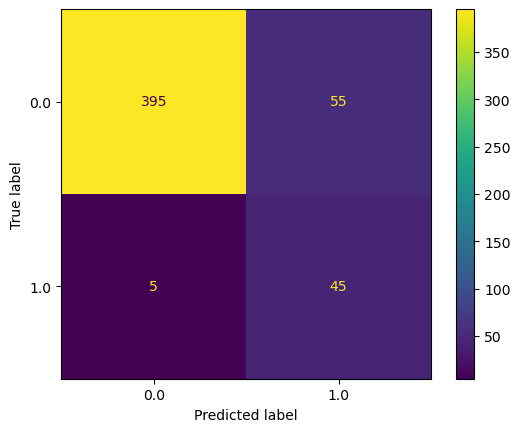

In [36]:
ConfusionMatrixDisplay.from_predictions(actual, predicted)

In [38]:
cm= confusion_matrix(actual, predicted)
print("Confusionn Matrix\n", cm)

accuracy= accuracy_score(actual, predicted)
precision= precision_score(actual, predicted)
recall= recall_score(actual, predicted)
f1= f1_score(actual, predicted)

print(f"Accuracy: {accuracy *100:.2f} %")
print(f"Precision: {precision *100:.2f} %")
print(f"Recall: {recall *100:.2f} %")
print(f"f1: {f1 *100:.2f} %")

Confusionn Matrix
 [[395  55]
 [  5  45]]
Accuracy: 88.00 %
Precision: 45.00 %
Recall: 90.00 %
f1: 60.00 %
